# BloomTech Data Science - Unit 2 Sprint 1 Module 1

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_absolute_error

In [2]:
import sys

if 'google.colab' in sys.modules:
  #if you are on Colab
  DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Linear-Models/master/data/'

# I. Wrangle Data

In [4]:
#ORIGINAL DATA READING
df = wrangle(DATA_PATH + 'condos/tribeca.csv')

In [13]:
print(list(df.columns)); print()
print(df.shape); print()
print(df.describe()); print()
print(df.describe(exclude='number')); print()
print(df.info()); print()

['NEIGHBORHOOD', 'BUILDING_CLASS_CATEGORY', 'ADDRESS', 'APARTMENT_NUMBER', 'ZIP_CODE', 'GROSS_SQUARE_FEET', 'YEAR_BUILT', 'SALE_PRICE', 'SALE_DATE']

(90, 9)

           ZIP_CODE  GROSS_SQUARE_FEET   YEAR_BUILT    SALE_PRICE
count     90.000000          90.000000    90.000000  9.000000e+01
mean    9651.711111        1766.355556  1584.777778  3.928736e+06
std     2096.997111        1018.749203   797.571930  3.621996e+06
min        0.000000         432.000000     0.000000  4.247700e+05
25%    10007.000000         873.500000  1905.250000  1.156552e+06
50%    10013.000000        1625.500000  1987.000000  2.750000e+06
75%    10280.000000        2308.250000  2006.000000  5.087500e+06
max    10282.000000        4986.000000  2016.000000  1.500000e+07

       NEIGHBORHOOD  ...   SALE_DATE
count            90  ...          90
unique            1  ...          52
top         TRIBECA  ...  2019-02-01
freq             90  ...           4

[4 rows x 5 columns]

<class 'pandas.core.frame.DataFrame'>


In [18]:
no_build_date = df[ df.loc[:]['YEAR_BUILT']==0 ]
print(no_build_date)

   NEIGHBORHOOD          BUILDING_CLASS_CATEGORY  ... SALE_PRICE   SALE_DATE
1       TRIBECA  13 CONDOS - ELEVATOR APARTMENTS  ...    2650000  2019-01-07
4       TRIBECA  13 CONDOS - ELEVATOR APARTMENTS  ...    1380000  2019-01-11
13      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS  ...    4900000  2019-01-18
35      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS  ...    1360000  2019-02-08
45      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS  ...    1651544  2019-02-27
48      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS  ...     858000  2019-02-28
49      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS  ...     685000  2019-03-04
59      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS  ...     424770  2019-03-15
62      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS  ...     520000  2019-03-25
64      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS  ...    4500000  2019-03-25
66      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS  ...    1320000  2019-04-02
72      TRIBECA  13 CONDOS - ELEVATOR APARTMENTS  ...    3850000  2019-04-08

In [19]:
df.value_counts()

NEIGHBORHOOD  BUILDING_CLASS_CATEGORY          ADDRESS                   APARTMENT_NUMBER  ZIP_CODE  GROSS_SQUARE_FEET  YEAR_BUILT  SALE_PRICE  SALE_DATE 
TRIBECA       13 CONDOS - ELEVATOR APARTMENTS  92 LAIGHT STREET, 4A      4A                10013.0   2221.0             2004.0      4600000     2019-04-22    1
                                               140 WEST STREET, 12F      12F               10007.0   2028.0             1930.0      3550000     2019-04-01    1
                                               166 DUANE STREET, 4C      4C                10013.0   2311.0             0.0         3400000     2019-04-10    1
                                               181 HUDSON STREET, 6D     6D                10013.0   1840.0             1909.0      2800000     2019-01-03    1
                                               195 HUDSON STREET, 2C     2C                10013.0   2436.0             0.0         4900000     2019-01-18    1
                                             

**High Cardinality** refers to columns which have many unique values

It is sometimes useful to split these into multiple columns if they contain a lot of information (e.g. address ---> street name would reduce cardinality)

For now, we will just drop them

Some variables can have the same value but mean completely different things e.g. the same appartment number in one building could be the penthouse of another

These have deceptively high cardinality

In [30]:
#DATA WRANGLING
def wrangle(url):
  df = pd.read_csv(url,
                    parse_dates=['SALE_DATE'], #Convert to Datetime objects as you read the data in
                    index_col='SALE_DATE') #Dates are usually the best way to split data, make them the index
  #na_values=[0.0] #This instructs pandas to read in 0s as null values, becareful using it! some columns may want zeroes

  df = df.drop(columns=['BUILDING_CLASS_CATEGORY', 'NEIGHBORHOOD']) # ONLY 1 VALUE
  df = df.drop(columns=['ADDRESS', 'APARTMENT_NUMBER']) # HIGH CARDINALITY
  
  df['YEAR_BUILT'] = df['YEAR_BUILT'].replace(0.0,np.NaN) #CORRECTLY IDENTIFY NULL VALUES
  df['ZIP_CODE'] = df['ZIP_CODE'].replace(0.0,np.NaN) #CORRECTLY IDENTIFY NULL VALUES
  df['GROSS_SQUARE_FEET'] = df['GROSS_SQUARE_FEET'].replace(0.0,np.NaN) #CORRECTLY IDENTIFY NULL VALUES
  df['SALE_PRICE'] = df['SALE_PRICE'].replace(0.0,np.NaN) #CORRECTLY IDENTIFY NULL VALUES
  return df

df = wrangle(DATA_PATH + 'condos/tribeca.csv')

In [31]:
print(df.isnull().sum())

ZIP_CODE              4
GROSS_SQUARE_FEET     0
YEAR_BUILT           18
SALE_PRICE            0
dtype: int64


In [32]:
df.head()

,ZIP_CODE,GROSS_SQUARE_FEET,YEAR_BUILT,SALE_PRICE
SALE_DATE,,,,
2019-01-03,10013.0,1840.0,1909.0,2800000
2019-01-07,10004.0,1759.0,NaN,2650000
2019-01-09,10004.0,1190.0,2005.0,1005000
2019-01-10,NaN,1088.0,2006.0,1678000
2019-01-11,10280.0,873.0,NaN,1380000


# II. Split Data

Split our dataset into a **feature matrix `X`** and a **target vector `y`**.

In [33]:
X = df[['GROSS_SQUARE_FEET']] #DOUBLE SQUARE BRACKETS MAKES IT A 2D DATAFRAME INSTEAD OF A SERIES
y = df['SALE_PRICE'] #TARGET is just a 1D series

In [34]:
print('Shape X:', X.shape)
print('Shape y:', y.shape)

Shape X: (90, 1)
Shape y: (90,)


# III. Establish Baseline

If you had a *naïve model* that could only predict one value, how well would you model perform?

In [35]:
baseline = y.mean() #Linear CONSTANT function, same prediction for every value, equivalent to slope = 0
print('Baseline:', baseline)

Baseline: 3928736.3666666667


In [44]:
y_pred = [baseline] * len(y) # LIST of repeating elements

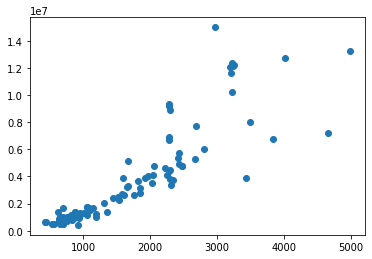

In [46]:
plt.scatter(X,y);

## MEAN ABSOLUTE ERROR

This will be the error metric we will use to determine whether or not our model is better than our baseline

$MAE = \sum \frac{|y-\hat{y}|}{n}$

In [48]:
baseline_mae = mean_absolute_error(y,y_pred)
print('Baseline MAE:', baseline_mae)

Baseline MAE: 2783380.1977777784


# IV. Build Model

In [50]:
#Import predictor class
from sklearn.linear_model import LinearRegression

#Instantiate the predictor
# Create a scafolding for the model
model_lr = LinearRegression()

#Fit the Model
model_lr.fit(X,y)

LinearRegression()

In [51]:
#Make Predictions (only needs feature matrix)
y_pred_lr = model_lr.predict(X)

# V. Check Metrics

In [52]:
lr_mae = mean_absolute_error(y,y_pred_lr)
print('Lienar Regression MAE:', lr_mae)

Lienar Regression MAE: 1176817.9930150746


# VI. Communicate Results

Plot model

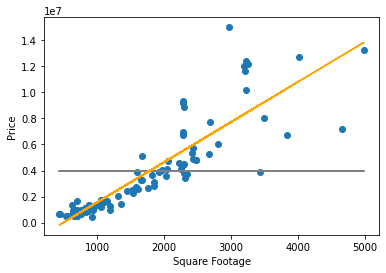

In [59]:
plt.scatter(X,y);
plt.xlabel('Gross Square Feet')
plt.ylabel('Price')
plt.plot(X,y_pred, label='Baseline', color='grey');
plt.plot(X,y_pred_lr, label='Linear Regression', color='orange');

What are our beta coefficients?

In [61]:
intercept = model_lr.intercept_
print(intercept)

-1505364.0408585514


In [63]:
slope = model_lr.coef_[0]
print(slope)

3076.4476554190023


In [69]:
print(f'PRICE = {intercept} + {slope} * GROSS_SQUARE_FEET')

PRICE = -1505364.0408585514 + 3076.4476554190023 * GROSS_SQUARE_FEET
